### ***--> Installing the required libraries***

In [19]:
pip install pandas matplotlib seaborn prophet scikit-learn

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

### ***--> Loading Daily Data***

In [21]:
yearly_data = pd.read_csv("/content/SN_y_tot_V2.0.csv", delimiter=';', header=None)
yearly_data.columns = ["FractionalYear", "SunspotNumber", "StdDev", "Observations", "Indicator"]
daily_data = yearly_data[yearly_data["SunspotNumber"] != -1]

# Convert fractional year to Date (taking only the fractional year column)
def fractional_year_to_date(fractional_year):
    year = int(fractional_year)  # Extract integer part as year
    fraction = fractional_year - year  # Decimal part as fraction of year
    month = int(fraction * 12) + 1  # Convert fraction to month (approx.)
    day = int((fraction * 12 - (month - 1)) * 30) + 1  # Estimate day in the month
    return pd.Timestamp(year=year, month=month, day=day)

# Apply the function to convert fractional year to datetime
yearly_data['Date'] = yearly_data['FractionalYear'].apply(fractional_year_to_date)

# Select relevant columns and rename for Prophet
yearly_data = yearly_data[['Date', 'SunspotNumber']].rename(columns={'Date': 'ds', 'SunspotNumber': 'y'})

# Display the resulting dataframe
print(yearly_data.head())

          ds     y
0 1700-07-01   8.3
1 1701-07-01  18.3
2 1702-07-01  26.7
3 1703-07-01  38.3
4 1704-07-01  60.0


###***--> Preprocess the data***

In [22]:
yearly_data['y'] = yearly_data['y'] + 1  # Add small constant to handle zeros
yearly_data = yearly_data.dropna()  # Drop remaining invalid rows

In [23]:
yearly_data = yearly_data[yearly_data['ds'] >= '1900-01-01']

###***--> Training the FBProphet Model***

In [24]:
# Initialize Prophet Model
yearly_model = Prophet()

# Fit the model
yearly_model.fit(yearly_data)

# Create future dataframe (1 year)
future_yearly = yearly_model.make_future_dataframe(periods=1, freq='Y')

# Predict
forecast_yearly = yearly_model.predict(future_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o723sox/hwlbxmpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o723sox/tdlycdo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36262', 'data', 'file=/tmp/tmp0o723sox/hwlbxmpv.json', 'init=/tmp/tmp0o723sox/tdlycdo7.json', 'output', 'file=/tmp/tmp0o723sox/prophet_modelj3_5uerz/prophet_model-20241128012156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


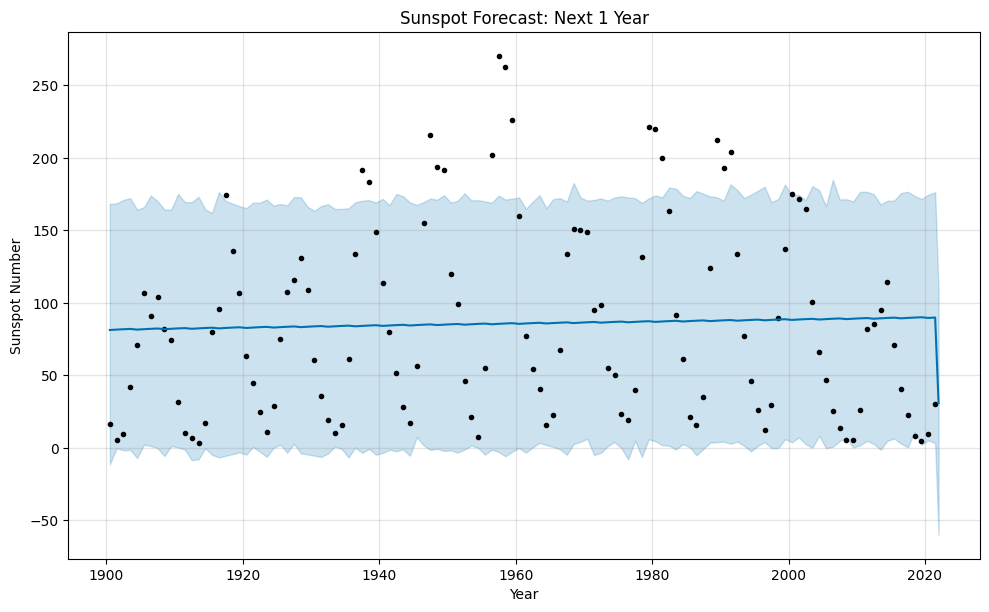

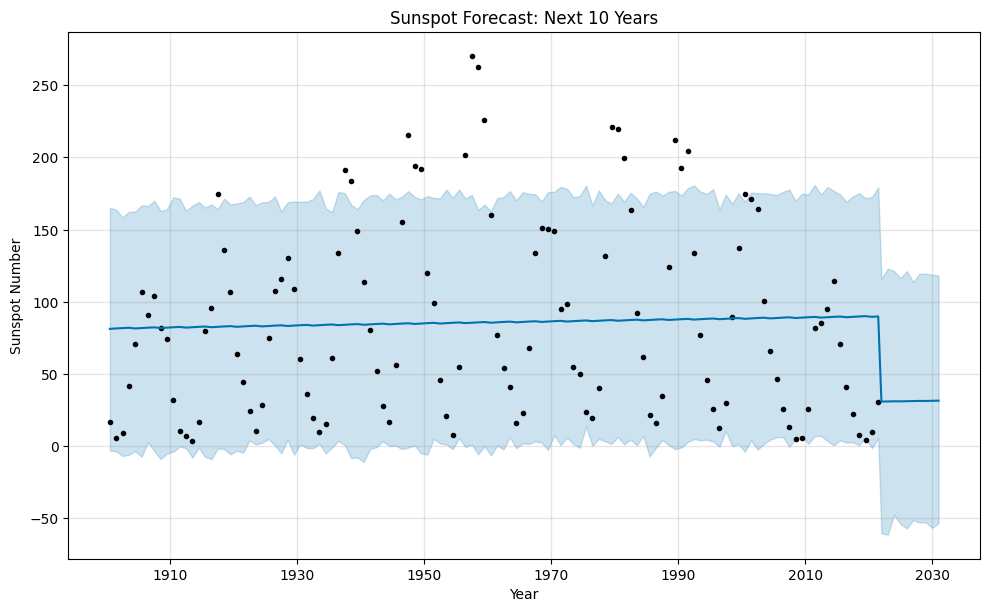

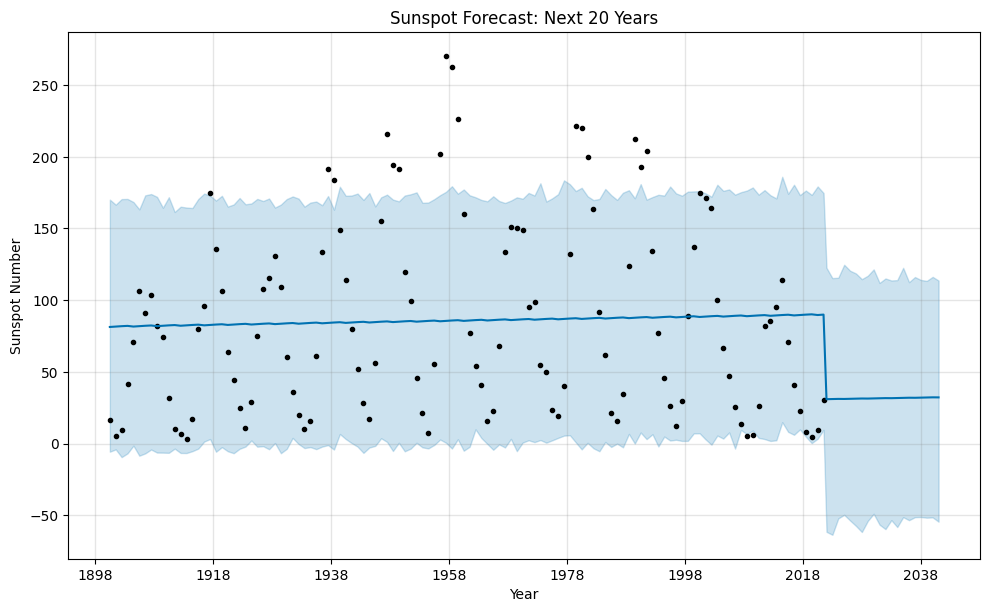

In [25]:
# Create a future dataframe for 1, 10, or 20 years
future_yearly_1 = yearly_model.make_future_dataframe(periods=1, freq='Y')   # Predict for the next 1 year
future_yearly_10 = yearly_model.make_future_dataframe(periods=10, freq='Y')  # Predict for the next 10 years
future_yearly_20 = yearly_model.make_future_dataframe(periods=20, freq='Y')  # Predict for the next 20 years

# Predict the future values
forecast_yearly_1 = yearly_model.predict(future_yearly_1)
forecast_yearly_10 = yearly_model.predict(future_yearly_10)
forecast_yearly_20 = yearly_model.predict(future_yearly_20)

# Visualize the forecast for the next 1 year
yearly_model.plot(forecast_yearly_1)
plt.title("Sunspot Forecast: Next 1 Year")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

# Visualize the forecast for the next 10 years
yearly_model.plot(forecast_yearly_10)
plt.title("Sunspot Forecast: Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

# Visualize the forecast for the next 20 years
yearly_model.plot(forecast_yearly_20)
plt.title("Sunspot Forecast: Next 20 Years")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

In [26]:
# Print the predicted values for each forecast
print("Predicted values for the next 1 year:")
print(forecast_yearly_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1))

print("Predicted values for the next 10 years:")
print(forecast_yearly_10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

print("Predicted values for the next 20 years:")
print(forecast_yearly_20[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))

Predicted values for the next 1 year:
            ds       yhat  yhat_lower  yhat_upper
122 2021-12-31  30.951558  -59.872445  107.801053
Predicted values for the next 10 years:
            ds       yhat  yhat_lower  yhat_upper
122 2021-12-31  30.951558  -60.230477  115.843340
123 2022-12-31  31.054356  -61.277635  123.036046
124 2023-12-31  31.151209  -47.461606  121.368193
125 2024-12-31  31.114782  -53.751753  116.429047
126 2025-12-31  31.223454  -56.883368  121.349839
127 2026-12-31  31.326252  -51.107796  113.686051
128 2027-12-31  31.423106  -52.776706  119.487595
129 2028-12-31  31.386678  -52.700606  119.547928
130 2029-12-31  31.495351  -56.508983  118.885739
131 2030-12-31  31.598149  -53.212445  118.182432
Predicted values for the next 20 years:
            ds       yhat  yhat_lower  yhat_upper
122 2021-12-31  30.951558  -61.535185  122.609582
123 2022-12-31  31.054356  -63.598983  115.388761
124 2023-12-31  31.151209  -52.186405  115.622054
125 2024-12-31  31.114782  -49.6

### ***--> Tune Hyperparameters : Adding custom seasonality***

In [30]:
yearly_model = Prophet(
    growth='linear',                 # Linear growth trend
    changepoint_prior_scale=0.05,    # Adjust sensitivity to trend changes
    seasonality_prior_scale=10,      # Control seasonality strength
    seasonality_mode='multiplicative'  # Use multiplicative seasonality
)

# Add custom seasonality to the model for an 11-year solar cycle (optional)
yearly_model.add_seasonality(name='solar_cycle', period=11, fourier_order=5)  # 11-year cycle
yearly_model.add_seasonality(name='half_solar_cycle', period=5.5 , fourier_order=3) # 5.5-year cycle

# Fit and Predict again
yearly_model.fit(yearly_data)
forecast_yearly = yearly_model.predict(future_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o723sox/2ls3gwb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o723sox/d454k2xo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50814', 'data', 'file=/tmp/tmp0o723sox/2ls3gwb8.json', 'init=/tmp/tmp0o723sox/d454k2xo.json', 'output', 'file=/tmp/tmp0o723sox/prophet_modelw43ieoto/prophet_model-20241128013034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


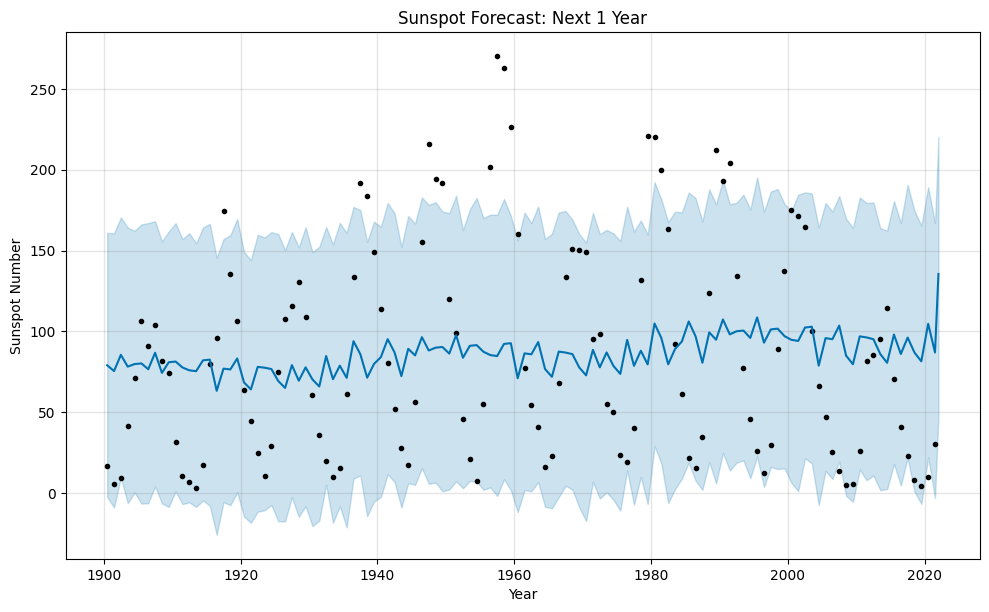

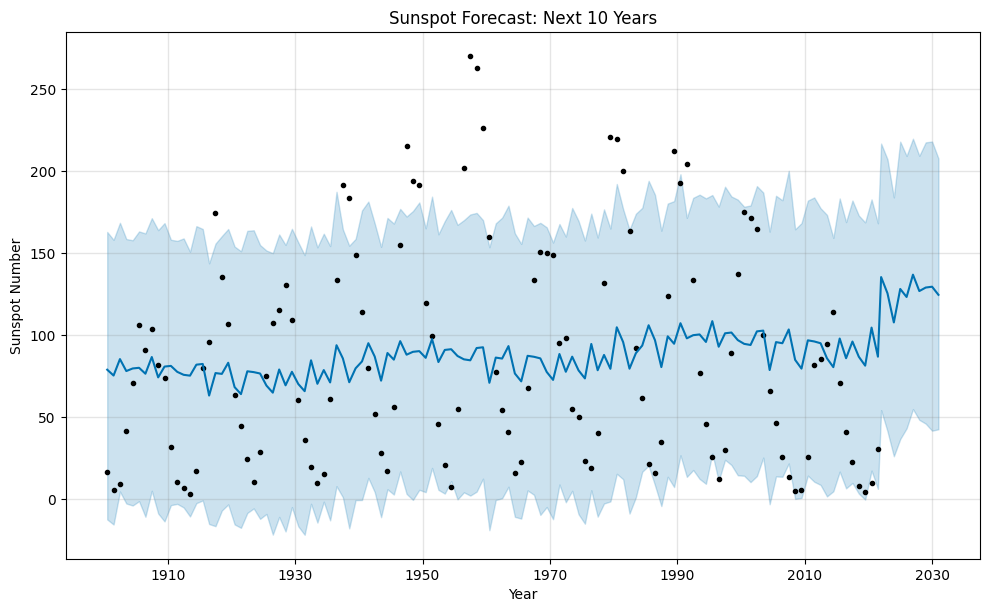

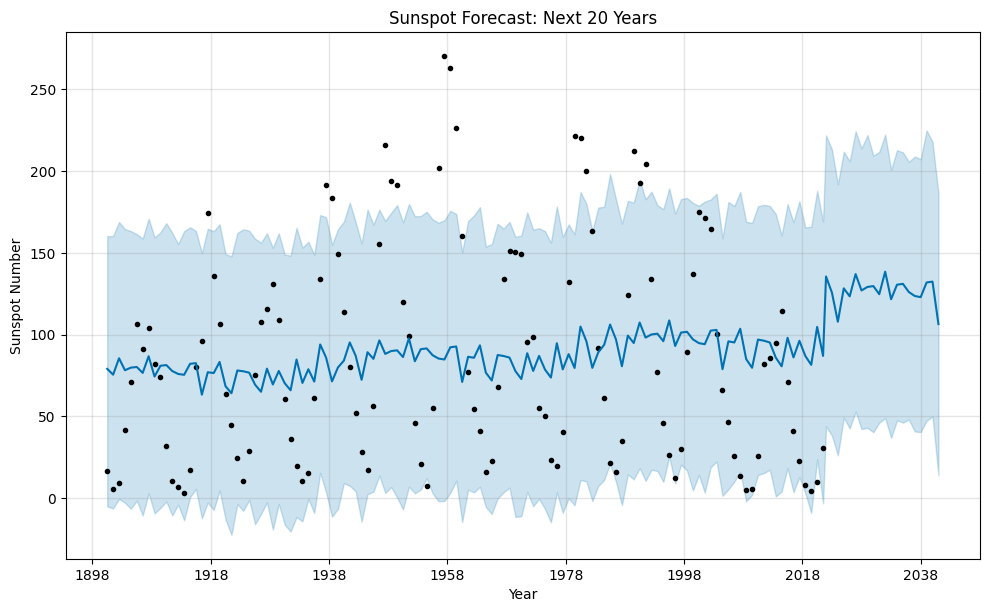

In [31]:
# Create a future dataframe for 1, 10, or 20 years
future_yearly_1 = yearly_model.make_future_dataframe(periods=1, freq='Y')   # Predict for the next 1 year
future_yearly_10 = yearly_model.make_future_dataframe(periods=10, freq='Y')  # Predict for the next 10 years
future_yearly_20 = yearly_model.make_future_dataframe(periods=20, freq='Y')  # Predict for the next 20 years

# Predict the future values
forecast_yearly_1 = yearly_model.predict(future_yearly_1)
forecast_yearly_10 = yearly_model.predict(future_yearly_10)
forecast_yearly_20 = yearly_model.predict(future_yearly_20)

# Visualize the forecast for the next 1 year
yearly_model.plot(forecast_yearly_1)
plt.title("Sunspot Forecast: Next 1 Year")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

# Visualize the forecast for the next 10 years
yearly_model.plot(forecast_yearly_10)
plt.title("Sunspot Forecast: Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

# Visualize the forecast for the next 20 years
yearly_model.plot(forecast_yearly_20)
plt.title("Sunspot Forecast: Next 20 Years")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

In [32]:
# Print the predicted values for each forecast
print("Predicted values for the next 1 year:")
print(forecast_yearly_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1))

print("Predicted values for the next 10 years:")
print(forecast_yearly_10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

print("Predicted values for the next 20 years:")
print(forecast_yearly_20[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))

Predicted values for the next 1 year:
            ds        yhat  yhat_lower  yhat_upper
122 2021-12-31  135.503149   47.590763  220.374234
Predicted values for the next 10 years:
            ds        yhat  yhat_lower  yhat_upper
122 2021-12-31  135.503149   54.373561  216.869968
123 2022-12-31  125.614392   41.465856  207.300699
124 2023-12-31  107.834552   26.236623  184.041110
125 2024-12-31  128.250963   36.745636  218.067766
126 2025-12-31  123.361294   43.265506  209.331986
127 2026-12-31  136.962835   55.011520  219.841639
128 2027-12-31  126.966592   48.446936  209.407679
129 2028-12-31  129.108811   46.149616  217.611913
130 2029-12-31  129.621424   41.851039  218.121970
131 2030-12-31  124.678622   42.704251  207.789981
Predicted values for the next 20 years:
            ds        yhat  yhat_lower  yhat_upper
122 2021-12-31  135.503149   43.940030  221.756811
123 2022-12-31  125.614392   38.218825  213.099011
124 2023-12-31  107.834552   26.181049  191.919181
125 2024-12-31 

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
# Evaluate using proper y_true and y_pred alignment
y_true = yearly_data['y']
y_pred = forecast_yearly['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, R²: {r2:.3f}")

MAE: 55.37, MAPE: 2.14, R²: 0.020
